In [12]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import pandas as pd
import seaborn as sns
from models.SSA import SSA

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

plt.style.use('seaborn-v0_8-whitegrid')

In [29]:
def RRSE(y_true, predictions):
    return np.sqrt(((y_true - predictions)**2).sum() / ((y_true - y_true.mean())**2).sum()) 

In [30]:
electricity = pd.read_csv(r'C:\Users\Никита\SSA\data\household_power_consumption.txt', sep = ';', low_memory=False)['Global_reactive_power']
electricity = np.array(electricity[electricity != '?']).astype('float32')

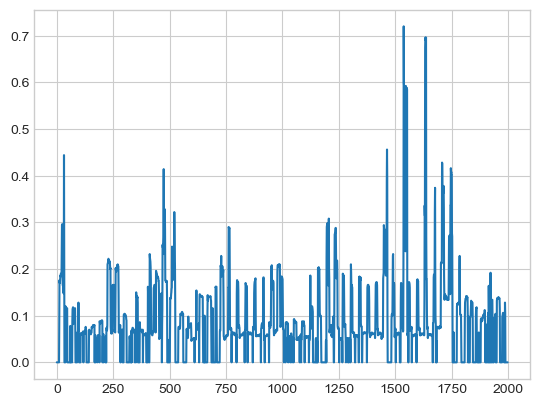

In [32]:
plt.plot(electricity[-2000:]);

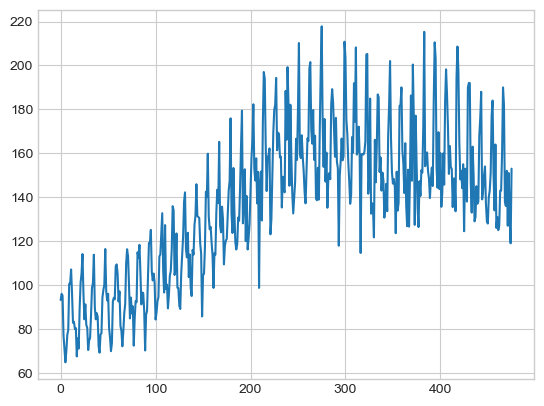

In [20]:
ts = pd.read_csv('beer_production.csv')['Monthly beer production'].to_numpy()
ts_train, ts_test = ts[:500], ts[-60:]

plt.plot(ts);

In [35]:
def validate_svd(ts,M, L, n_components):
    ts_train, ts_test = ts[:-M], ts[-M:]
    ts_new = np.hstack([ts_train, np.zeros(M) + ts_train[-L:].mean()])
    ssa = SSA(l = L, rank = n_components)
    transformed_ts, _ = ssa.transform_to_series(ts_new)

    preds = transformed_ts[:n_components,-M:].sum(0)

    r2 = r2_score(ts_test, preds)
    mape = mean_absolute_percentage_error(ts_test, preds)

    return r2, mape, preds, transformed_ts, ts_test
    

R2: 0.5114023004960315
MAPE 0.09033191570660297


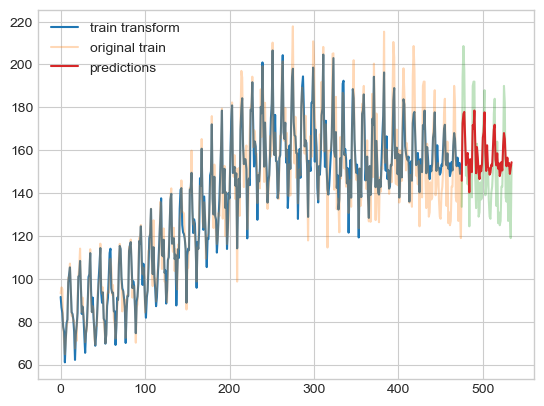

In [70]:
L = 12*7
M = 60
n_components = 12

r2, mape, preds, transformed_ts, ts_test = validate_svd(ts,M, L, n_components)


plt.plot(transformed_ts[:n_components,:].sum(0), label = 'train transform')
plt.plot(ts, label = 'original train', alpha = 0.3)
plt.plot(np.arange(ts_train.shape[0]-1, ts_train.shape[0]+59), ts_test, alpha = 0.3)
plt.plot(np.arange(ts_train.shape[0]-1, ts_train.shape[0]+59), preds, label = 'predictions')

print('R2:', r2)
print('MAPE', mape)
plt.legend();

R2: -1.155853898305082
MAPE 0.0622068365024656


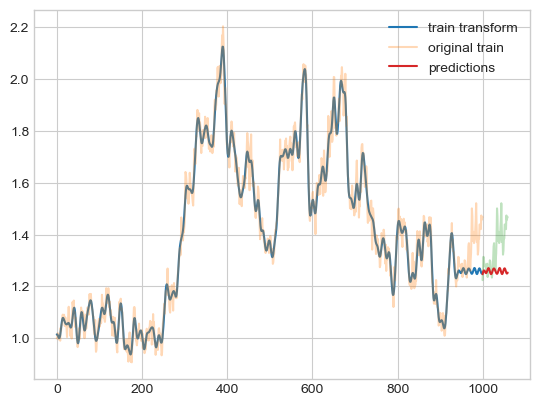

In [89]:
ts = np.load('gbm_process.npy')

L = 12*10
M = 60
n_components = 20

r2, mape, preds, transformed_ts, ts_test = validate_svd(ts,M, L, n_components)


plt.plot(transformed_ts[:n_components,:].sum(0), label = 'train transform')
plt.plot(ts, label = 'original train', alpha = 0.3)
plt.plot(np.arange(transformed_ts.shape[1]-1, transformed_ts.shape[1]+M-1), ts_test, alpha = 0.3)
plt.plot(np.arange(transformed_ts.shape[1]-1, transformed_ts.shape[1]+M-1), preds, label = 'predictions')

print('R2:', r2)
print('MAPE', mape)
plt.legend();

R2: 0.2693562053976776
MAPE 1.4737987250272344


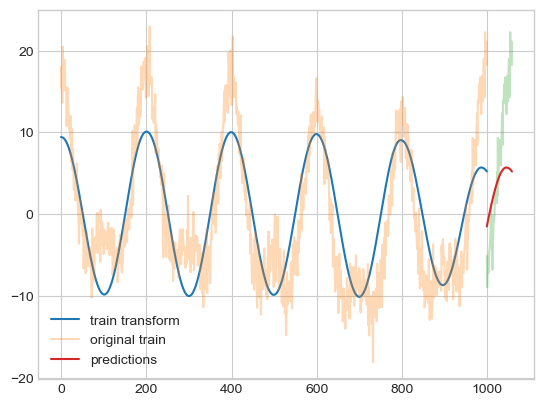

In [106]:
ts = np.load('noisy_exp_cos_poly.npy')

L = 50*4
M = 60
n_components = 2

r2, mape, preds, transformed_ts, ts_test = validate_svd(ts,M, L, n_components)


plt.plot(transformed_ts[:n_components,:].sum(0), label = 'train transform')
plt.plot(ts, label = 'original train', alpha = 0.3)
plt.plot(np.arange(transformed_ts.shape[1]-1, transformed_ts.shape[1]+M-1), ts_test, alpha = 0.3)
plt.plot(np.arange(transformed_ts.shape[1]-1, transformed_ts.shape[1]+M-1), preds, label = 'predictions')

print('R2:', r2)
print('MAPE', mape)
plt.legend();

## Electricity

1.594293578175686
R2: -1.5417718869066657
MAPE 284292665381476.3


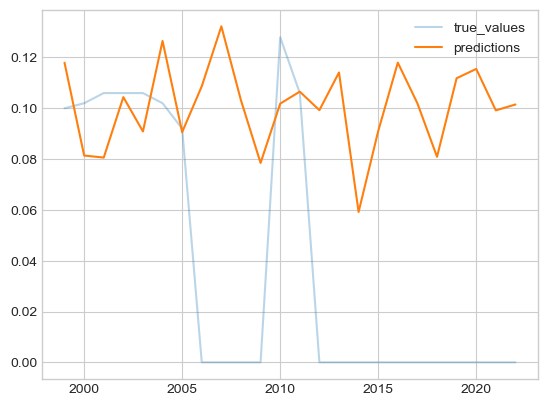

In [61]:
L = 1000
M = 24
n_components = 300

r2, mape, preds, transformed_ts, ts_test = validate_svd(electricity[-2000:],M, L, n_components)
print(RRSE(ts_test,preds))

#plt.plot(transformed_ts[:n_components,:].sum(0), label = 'train transform')
#plt.plot(electricity[-2000:], label = 'original train', alpha = 0.3)
plt.plot(np.arange(transformed_ts.shape[1]-1, transformed_ts.shape[1]+M-1), ts_test, alpha = 0.3, label = 'true_values')
plt.plot(np.arange(transformed_ts.shape[1]-1, transformed_ts.shape[1]+M-1), preds, label = 'predictions')

print('R2:', r2)
print('MAPE', mape)
plt.legend();